# Final Project 
Context of this network:
According to Lusseau et al. (2003), a study of the social interactions of a bottlenose dolphin community residing in Doubtful Sound New Zealand has shown a temporally stable community structure with long lasting associations between individuals. This group of dolphins reside in a fjord, a geographically isolated deep coastal environment. One interesting and unique attribute of this community structure is that strong associations were observed between and within sexes. This stable community structure is “unprecedented in studies of bottlenose dolphins” (Lusseau et al. 2003). No permanent emigration/immigration had been observed in the last 7 years. 
Authors theorize that the observed stability of the community structure may be a survival mechanism given the isolation of the community and the ecological constraints of the Doubtful Sound Fjord. The low-productivity ecosystem may require greater cooperation among dolphins to promote survival, and the low chance of survival for dispersing individuals may further increase the stability of associations (Lusseau et al. 2003). 

In [3]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# The Network Graph
The nodes in the network describe individual dolphins with their names included (metadata). There are 62 nodes.

The edges in the network show frequent associations among the 62 dolphins living off Doubtful Sound, New Zealand. There are 159 edges.

The graph is connected. The graph is undirected, as specified by D. Lusseau et al. (2003).

In [4]:
dolphin_graph = nx.read_gml('dolphins.gml')

In [5]:
N = len(dolphin_graph)
print(N)

62


159


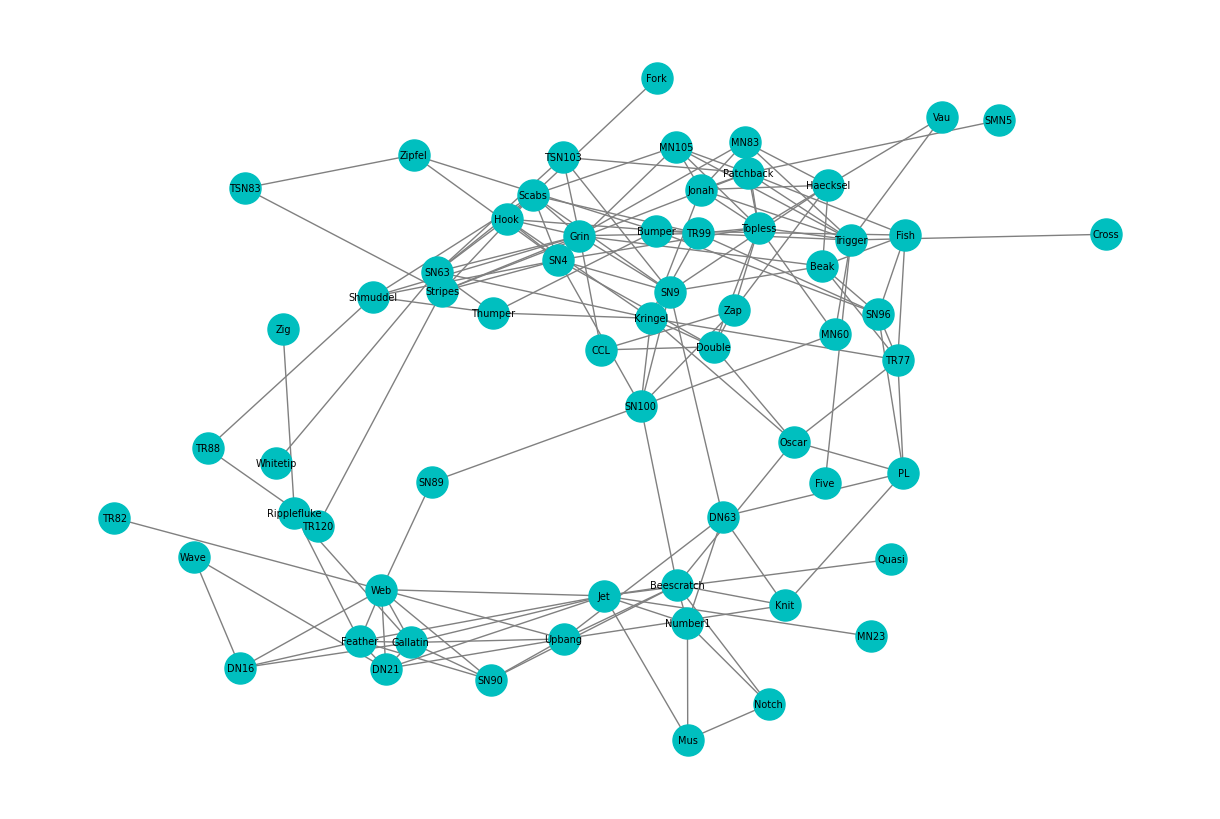

In [5]:
pos=nx.spring_layout(dolphin_graph, k=0.5)
plt.figure(figsize=(12,8))
nx.draw(dolphin_graph, pos, node_color='c', node_size=500, edge_color='gray',font_size=7, with_labels=True)
print(dolphin_graph.number_of_edges())

# Centrality in the Network Graph
The most central nodes in the network were determined for each of the four centrality metrics we've discussed in class. Grin is the dolphin with the highest degree centrality and highest eigenvector centrality. Grin has the greatest number of frequent interactions with other dolphins (degree centrality). Grin is friends with other important dolphins (eigenvector centrality). SN100 is the dolphin with the highest closeness centrality and betweenness centrality. SN100 is close to lots of other dolphins in the network (closeness) and connects other dolphins in the network (betweenness).  
The network is plotted with a different colour for each "most central" node. 
We found that the degree centrality metric is the most informative because it describes which dolphin (Grin) has the greatest number of temporally stable associations (long-term dolphin friends!). However, understanding that SN100 has the highest betweenness centrality is informative becuase it explains that SN100 plays an important role in mainting the connectivity between different subgroups in the network. 

In [8]:
deg_cen = nx.degree_centrality(dolphin_graph)
close_cen = nx.closeness_centrality(dolphin_graph)
eig_cen = nx.eigenvector_centrality(dolphin_graph)
bet_cen = nx.betweenness_centrality(dolphin_graph)

print('The dolphin with highest degree centrality is', max(deg_cen, key=lambda key: deg_cen[key]))
print('The dolphin with highest closeness centrality is', max(close_cen, key=lambda key: close_cen[key]))
print('The dolphin with highest eigenvector centrality is', max(eig_cen, key=lambda key: eig_cen[key]))
print('The dolphin with highest betweenness centrality is', max(bet_cen, key=lambda key: bet_cen[key]))

The dolphin with highest degree centrality is Grin
The dolphin with highest closeness centrality is SN100
The dolphin with highest eigenvector centrality is Grin
The dolphin with highest betweenness centrality is SN100


In [6]:
i=0
for node in dolphin_graph.nodes():
    print(i,node)
    i=i+1

0 Beak
1 Beescratch
2 Bumper
3 CCL
4 Cross
5 DN16
6 DN21
7 DN63
8 Double
9 Feather
10 Fish
11 Five
12 Fork
13 Gallatin
14 Grin
15 Haecksel
16 Hook
17 Jet
18 Jonah
19 Knit
20 Kringel
21 MN105
22 MN23
23 MN60
24 MN83
25 Mus
26 Notch
27 Number1
28 Oscar
29 Patchback
30 PL
31 Quasi
32 Ripplefluke
33 Scabs
34 Shmuddel
35 SMN5
36 SN100
37 SN4
38 SN63
39 SN89
40 SN9
41 SN90
42 SN96
43 Stripes
44 Thumper
45 Topless
46 TR120
47 TR77
48 TR82
49 TR88
50 TR99
51 Trigger
52 TSN103
53 TSN83
54 Upbang
55 Vau
56 Wave
57 Web
58 Whitetip
59 Zap
60 Zig
61 Zipfel


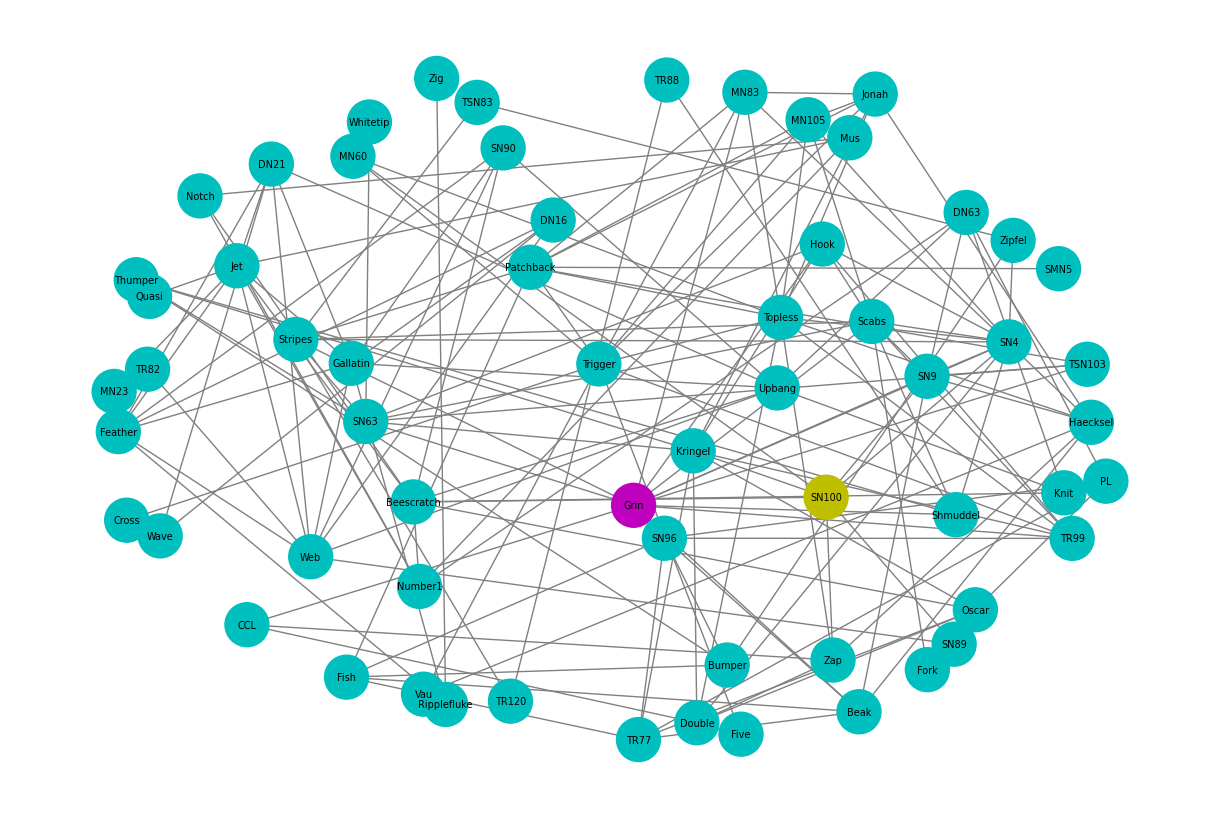

In [7]:
len(dolphin_graph)
colors = ['c'] * len(dolphin_graph)
colors[14] = 'm'
colors[36]='y'
pos=nx.spring_layout(dolphin_graph,k=1.5)
plt.figure(figsize=(12,8))
nx.draw(dolphin_graph, pos, node_color=colors, node_size=1000, edge_color='gray',font_size=7, with_labels=True)

# The Network Adjacency Matrix 
The graph is unweighted because the values in the adjacency matrix are only 1 or 0. 

In [11]:
folder = ""
file = "dolphins"
ext = ".npy"
dolphins = np.load(folder+file+ext)

print(dolphins)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


# Communities in the Network Graph
Communities in the network were determined using the Girvan-Newman graph partitioning algorithm. There are two Girvan-Newman communities in this network. Grin is in the center of the purple community, which correlates to its high degree and eigenvector centrality. SN100 has “friends” in both groups, which is in line with its high betweenness and closeness centrality. This seems like a good representation of communities in this network, as the clustering appears higher within the given communities than it does between members of different communities. 

In [31]:
from networkx.algorithms.community import girvan_newman
comm = girvan_newman(dolphin_graph)
gn_communities = tuple(sorted(eig_cen) for eig_cen in next(comm))

In [33]:
def switch_to_numbers(G, C):
    num_comm = len(C)
    a = []
    for c in range(num_comm):
        a.append([0])
    for i, node in enumerate(G.nodes()):
        for j in range(num_comm):
            if node in C[j]:
                a[j].append(i)
    for c in range(num_comm):
        a[c] = a[c][1:]
    return a

In [70]:
import matplotlib.cm as cmx
def Plot_Comm(Network, C, position = None):
    cmap = cmx.get_cmap(name='rainbow')
    N = len(Network.nodes())
    K = len(C)
    color_map = ['k']*N
    for i in range(K):
        for j in range(len(C[i])):
            color_map[ C[i][j] ] = cmap(i/K)
    if position is None:
        pos = nx.spring_layout(Network, k=5,iterations=20)
    else:
        pos = position
    fig = plt.figure(figsize=(12,8))
    nx.draw(Network, pos, node_color=color_map, node_size=1000, edge_color='grey', font_size = 8, with_labels=True)
    plt.show()
    return

In [36]:
gn_communities_num = switch_to_numbers(dolphin_graph, gn_communities)

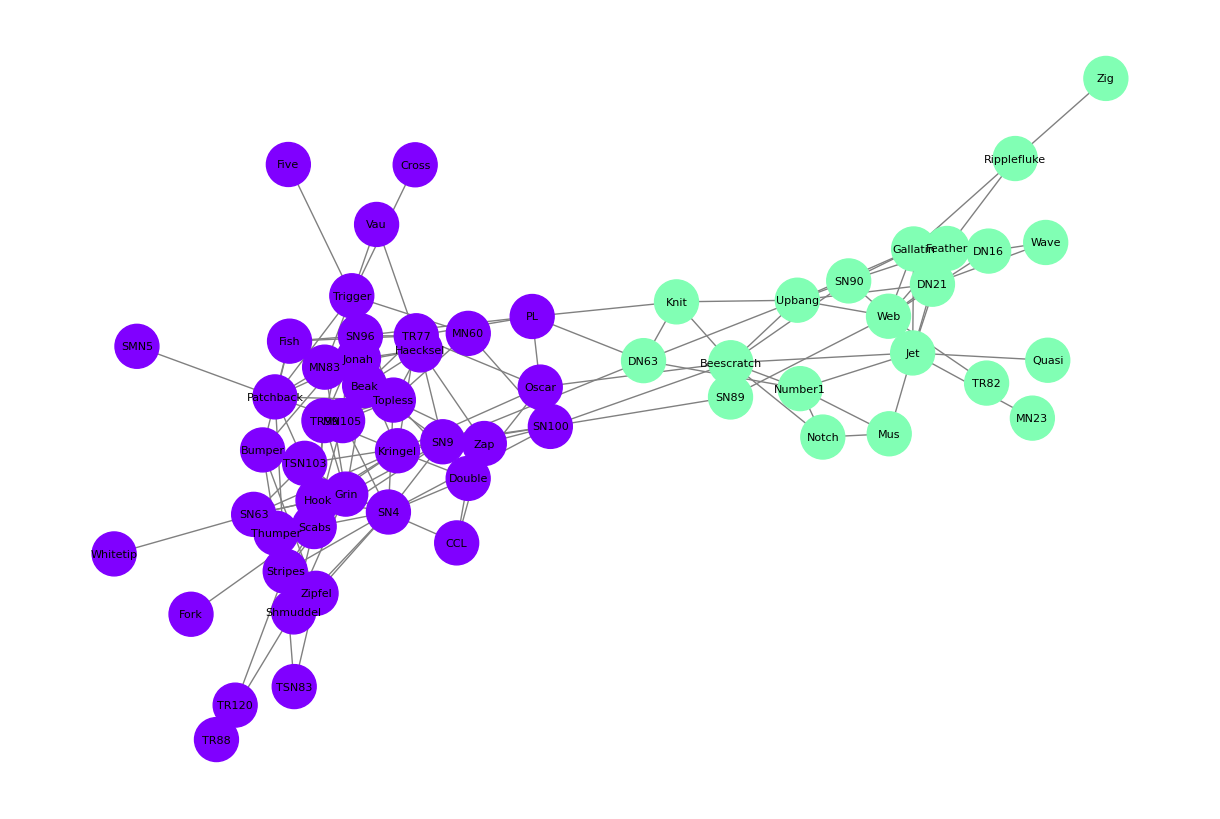

In [76]:
Plot_Comm(dolphin_graph, gn_communities_num, nx.spring_layout(dolphin_graph))

# Clustering in the Dolphin Network
There are fifteen dolphins in the network with a clustering coefficient of 0.0 - these dolphins have no connected friends, or only one friend. The two dolphins with the highest clustering coefficient are Mus and Notch, at 0.667. They are part of a tight-knit core in the green community. The average clustering coefficient of the network is 0.259. The network is therefore low-to-moderately clustered. 

In [48]:
clustering = nx.algorithms.clustering(dolphin_graph)
print('The node with lowest clustering coefficient is', min(clustering, key=lambda key: clustering[key]))

print('also:')

print('Five, Fork, MN23, Quasi, SMN5, SN89, TR82, TR88, TR120, TSN83, Vau, Wave, Whitetip, Zig')

print(' ')

print('The nodes with the highest clustering coefficient are', max(clustering, key=lambda key: clustering[key]), 'and Notch')
print(' ')
average_cc = nx.algorithms.average_clustering(dolphin_graph)
print('The average clustering coefficient for the dolphin network is ', average_cc)

The node with lowest clustering coefficient is Cross
also:
Five, Fork, MN23, Quasi, SMN5, SN89, TR82, TR88, TR120, TSN83, Vau, Wave, Whitetip, Zig
 
The nodes with the highest clustering coefficient are Mus and Notch
 
The average clustering coefficient for the dolphin network is  0.2589582460550202


# Conclusions 
Upon graphing and analyzing the dataset, we learned a great deal about the uniquely stable community structure of a bottlenose dolphin community. After applying the graph partitioning algorithm and seeing the two distinct communities, we thought about the dataset differently. It was interesting to see how there were stronger interactions between sub-groups of dolphins in the network. It was also interesting to learn about how the unprecedented stability of this community may be caused by the ecological constraints of the Doubtful Sound ecosystem. 
We lacked the tools to understand how strong each edge in the network is, which would provide us insight into the frequency of interactions between dolphins. If the graph were weighted, this would provide insight into the strength of the associations between dolphins. Additionally, if we had metadata about the familial networks in this community, that would provide interesting insight into how family ties may relate to the stability of associations in the network. Do dolphins in this community have a tendency to maintain associations with their parents or siblings? 